<a href="https://colab.research.google.com/github/AlijaNoushad/Alija-assignments-casestudy/blob/main/exitexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
train = pd.read_csv('/content/train-corrected.zip')
test = pd.read_csv('/content/test_Vges7qu.csv')

In [ ]:
train.fillna(-1, inplace=True)
test.fillna(-1, inplace=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# train.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)
# test.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

In [ ]:
age_map = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
train['Age'] = train['Age'].map(age_map)

In [ ]:
train['User_Freq'] = train['User_ID'].map(train['User_ID'].value_counts())
train['Product_Freq'] = train['Product_ID'].map(train['Product_ID'].value_counts())

In [ ]:
train['Total_Category_Score'] = train['Product_Category_1'] + train['Product_Category_2'] + train['Product_Category_3']

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=300, max_depth=8, learning_rate=0.05, subsample=0.8)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-validated RMSE:", -scores.mean())

Cross-validated RMSE: 2790.272265625


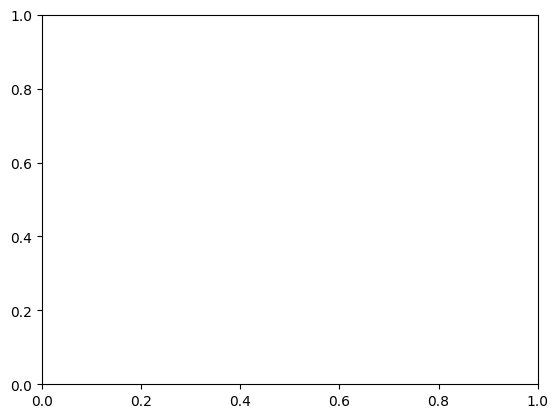

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
train_plot = train.dropna(subset=['Age']).copy()

sns.boxplot(x='Age', y='Purchase', data=train_plot)
plt.show()

In [ ]:
submission = pd.read_csv('/content/sample_submission_V9Inaty.csv')
submission['Purchase'] = y_pred
submission.to_csv('final_submission.csv', index=False)

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1)
model.fit(train.drop(['Purchase', 'Product_ID'], axis=1), train['Purchase'])

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

preds = model.predict(train.drop(['Purchase', 'Product_ID'], axis=1))
rmse = np.sqrt(mean_squared_error(train['Purchase'], preds))
print("RMSE:", rmse)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, train.drop(['Purchase', 'Product_ID'], axis=1), train['Purchase'], cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

In [ ]:
test_preds = model.predict(test.drop(['Comb', 'Product_ID'], axis=1))
submission = pd.read_csv('/content/sample_submission_V9Inaty.csv')
submission['Purchase'] = test_preds
submission.to_csv('final_submission.csv', index=False)

In [ ]:
test_preds = model.predict(test.drop(['Comb', 'Product_ID'], axis=1))
submission = pd.read_csv('/content/sample_submission_V9Inaty.csv')
submission['Purchase'] = test_preds
submission.to_csv('final_submission.csv', index=False)

In [ ]:
from google.colab import files
files.download('final_submission.csv')

In [100]:
y_pred = model.predict(X_test)